# Notebook for Drone Navigation Through Maze

This notebook seeks to be a controller and reporting for CoDrone. It will use its capabilities to and onboard sensors to navigate a maze and report back the metrics from the flight. 

### Tunnels to Navigate

<div>
<img src="Images/tunnel.jpg" width="400"/>
</div>


### Drone Layout

<div>
<img src="Images/DroneLayout.png" width="800"/>
</div>


I will attempt to take advantage of the Front Range Sensor as well as the Optical Flow and and Bottom Range Sensor.

Quick Defitinons:

Front Range Sensor - 

Bottom Range Sensor - 

Optical Flow Sensor - 

#### Controlling the Drone

In [2]:
from codrone_edu.drone import *
import time
import pandas as pd

In [82]:
drone.close()

In [3]:
drone = Drone()
drone.pair()

Running codrone-edu library version 2.3
Detected CoDrone EDU controller at port COM5
Connected to CoDrone EDU.
Battery = 100%


True

In [34]:
drone.land()

In [74]:
drone.get_battery()

100

In [92]:
drone.takeoff()


In [51]:
drone.send_absolute_position(0.5, 0, 1, 0.5, 0, 0)


### Hovering Observation

In [94]:
drone.takeoff()
time.sleep(2)
drone.hover()
samples = []
start = time.time()

try:
    for _ in range(100):  # 10 seconds @ 0.1s interval
        t = time.time() - start
        height = drone.get_height()

        # Angles
        roll = drone.get_angle_x()
        pitch = drone.get_angle_y()
        yaw = drone.get_angle_z()

        # Angular speed
        roll_rate = drone.get_angular_speed_x()
        pitch_rate = drone.get_angular_speed_y()
        yaw_rate = drone.get_angular_speed_z()

        # Acceleration
        ax = drone.get_accel_x()
        ay = drone.get_accel_y()
        az = drone.get_accel_z()

        samples.append([
            t, height,
            roll, pitch, yaw,
            roll_rate, pitch_rate, yaw_rate,
            ax, ay, az
        ])

        time.sleep(0.1)

finally:
    drone.land()

In [118]:
drone.land()

In [116]:

trim_settings = [
    {'pitch': 0, 'roll': -10},
    {'pitch': 0, 'roll': 0},
    {'pitch': 0, 'roll': 10}
]

results = []

for i, trim in enumerate(trim_settings):
    print(f"\n=== Trial {i+1} | Trim: {trim} ===")

    # Apply trim
    drone.set_trim(roll=trim['roll'], pitch=trim['pitch'])
    time.sleep(1)

    drone.takeoff()
    time.sleep(2)
    drone.hover()

    start = time.time()

    try:
        for _ in range(100):  # ~10 seconds at 0.1s interval
            t = time.time() - start
            height = drone.get_height()

            roll = drone.get_angle_x()
            pitch = drone.get_angle_y()
            yaw = drone.get_angle_z()

            roll_rate = drone.get_angular_speed_x()
            pitch_rate = drone.get_angular_speed_y()
            yaw_rate = drone.get_angular_speed_z()

            ax = drone.get_accel_x()
            ay = drone.get_accel_y()
            az = drone.get_accel_z()

            results.append([
                i + 1, t, trim['roll'], trim['pitch'], height,
                roll, pitch, yaw,
                roll_rate, pitch_rate, yaw_rate,
                ax, ay, az
            ])

            time.sleep(0.1)

    finally:
        drone.land()
        time.sleep(3)  # Let it settle before next test

# Create DataFrame
columns = [
    "Trial", "Time", "TrimRoll", "TrimPitch", "Height",
    "Roll", "Pitch", "Yaw",
    "RollRate", "PitchRate", "YawRate",
    "AccelX", "AccelY", "AccelZ"
]

df_trim = pd.DataFrame(results, columns=columns)

print("All trials complete. Data stored in DataFrame 'df'.")



=== Trial 1 | Trim: {'pitch': 0, 'roll': -10} ===

=== Trial 2 | Trim: {'pitch': 0, 'roll': 0} ===

=== Trial 3 | Trim: {'pitch': 0, 'roll': 10} ===


KeyboardInterrupt: 

In [119]:
df_trim

NameError: name 'df_trim' is not defined

### Throttle v. Climb Rate

In [ ]:
drone.land()

In [124]:
throttle_levels = [20, 30, 40,50]
results = []

for i, throttle in enumerate(throttle_levels):
    print(f"\n=== Trial {i+1} | Throttle: {throttle} ===")
    drone.takeoff()
    drone.set_throttle(throttle)
    drone.move()
    start = time.time()

    try:
        for _ in range(20):  # ~2 seconds at 0.1s interval
            t = time.time() - start
            height = drone.get_height()
            bottom_range = drone.get_bottom_range()

            roll = drone.get_angle_x()
            pitch = drone.get_angle_y()
            yaw = drone.get_angle_z()

            roll_rate = drone.get_angular_speed_x()
            pitch_rate = drone.get_angular_speed_y()
            yaw_rate = drone.get_angular_speed_z()

            ax = drone.get_accel_x()
            ay = drone.get_accel_y()
            az = drone.get_accel_z()

            results.append([
                i + 1, throttle, t, height, bottom_range,
                roll, pitch, yaw,
                roll_rate, pitch_rate, yaw_rate,
                ax, ay, az
            ])

            time.sleep(0.1)

    finally:
        drone.set_throttle(0)
        drone.land()
        time.sleep(3)  # Let it settle before next test

# Create DataFrame
columns = [
    "Trial", "Throttle", "Time", "Height", "BottomRange",
    "Roll", "Pitch", "Yaw",
    "RollRate", "PitchRate", "YawRate",
    "AccelX", "AccelY", "AccelZ"
]

df_throttle_test = pd.DataFrame(results, columns=columns)

print("All throttle trials complete. Data stored in DataFrame 'df_throttle_test'.")


=== Trial 1 | Throttle: 20 ===

=== Trial 2 | Throttle: 30 ===

=== Trial 3 | Throttle: 40 ===

=== Trial 4 | Throttle: 50 ===
All throttle trials complete. Data stored in DataFrame 'df_throttle_test'.


In [125]:
df_throttle_test

,Trial,Throttle,Time,Height,BottomRange,Roll,Pitch,Yaw,RollRate,PitchRate,YawRate,AccelX,AccelY,AccelZ
0,1,20,0.000000,0.0,80.7,0,1,0,-2,-1,0,-5,-7,98
1,1,20,0.215386,82.3,82.3,0,1,0,-3,1,1,6,-5,99
2,1,20,0.431938,82.3,82.3,0,1,0,1,0,1,-2,-9,101
3,1,20,0.647280,83.7,83.7,0,1,0,1,0,0,-9,0,97
4,1,20,0.862840,85.5,85.5,0,1,0,0,-2,0,-5,2,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,50,3.253241,173.9,173.9,0,1,0,0,0,1,2,-5,95
76,4,50,3.471663,189.6,189.6,0,1,0,2,0,0,-5,8,94
77,4,50,3.686735,194.7,194.7,0,1,0,-1,0,-1,0,-5,105
78,4,50,3.903900,199.5,199.5,0,1,0,4,1,-3,-2,8,96


In [129]:
climb_rates = []

for trial in df_throttle_test['Trial'].unique():
    subset = df_throttle_test[df_throttle_test['Trial'] == trial]
    delta_h = subset['Height'].iloc[-1] - subset['Height'].iloc[0]
    delta_t = subset['Time'].iloc[-1] - subset['Time'].iloc[0]
    climb_rate = delta_h / delta_t
    throttle = subset['Throttle'].iloc[0]
    climb_rates.append((throttle, climb_rate))

df_climb = pd.DataFrame(climb_rates, columns=['Throttle', 'ClimbRate'])
print(df_climb)



   Throttle   ClimbRate
0        20   24.267227
1        30   10.548576
2        40  206.110128
3        50 -193.115916


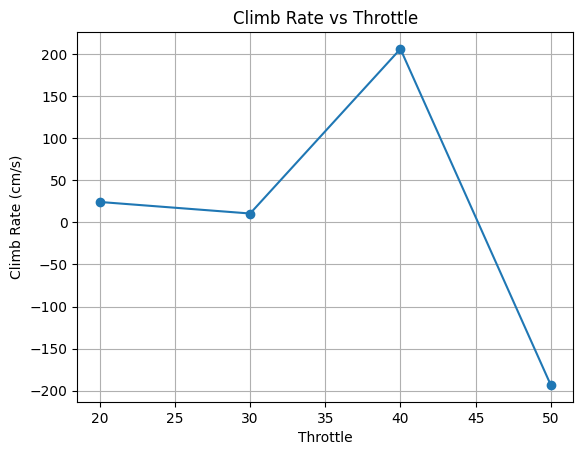

In [130]:
plt.plot(df_climb['Throttle'], df_climb['ClimbRate'], marker='o')
plt.title("Climb Rate vs Throttle")
plt.xlabel("Throttle")
plt.ylabel("Climb Rate (cm/s)")
plt.grid(True)
plt.show()

In [102]:
df_hover = pd.DataFrame(samples, columns=[
    "Time", "Height",
    "Roll", "Pitch", "Yaw",
    "RollRate", "PitchRate", "YawRate",
    "AccelX", "AccelY", "AccelZ"
])

In [109]:
df.head(10)

,Time,Height,Roll,Pitch,Yaw,RollRate,PitchRate,YawRate,AccelX,AccelY,AccelZ
0,0.000000,75.8,0,0,0,0,0,0,-4,8,100
1,0.206126,73.6,0,0,0,-1,0,0,-3,0,95
2,0.410720,72.0,0,0,0,0,0,0,1,5,103
3,0.616423,72.0,0,0,0,0,0,0,2,-7,90
4,0.822823,73.9,0,0,0,-1,0,0,-4,8,101
5,1.029046,72.0,0,0,0,-1,0,0,0,-3,89
6,1.235455,76.0,0,0,0,-1,0,0,5,-4,104
7,1.442916,73.5,0,0,0,-1,1,0,0,5,104
8,1.653718,73.5,0,0,0,0,0,0,-3,4,102
9,1.862594,73.5,0,1,0,-4,0,0,0,16,83


In [107]:
def hover_stability_report(df):
    print("📏 Height:")
    print("  Std Dev:", round(df["Height"].std(), 2))
    print("  Range  :", round(df["Height"].max() - df["Height"].min(), 2))

    print("\n🧭 Yaw Drift:")
    print("  Start:", df["Yaw"].iloc[0], "→ End:", df["Yaw"].iloc[-1])
    print("  Drift:", df["Yaw"].iloc[-1] - df["Yaw"].iloc[0])

    print("\n↔️ Roll / Pitch:")
    print("  Roll Std Dev :", round(df["Roll"].std(), 2))
    print("  Pitch Std Dev:", round(df["Pitch"].std(), 2))

    print("\n⚡ Acceleration Noise:")
    print(df[["AccelX", "AccelY", "AccelZ"]].std().round(2))


In [108]:
hover_stability_report(df_hover)

📏 Height:
  Std Dev: 3.15
  Range  : 11.3

🧭 Yaw Drift:
  Start: 0 → End: 0
  Drift: 0

↔️ Roll / Pitch:
  Roll Std Dev : 0.36
  Pitch Std Dev: 0.47

⚡ Acceleration Noise:
AccelX    4.05
AccelY    7.77
AccelZ    6.51
dtype: float64


### Color Test

In [135]:
for _ in range(200):
    print(drone.get_colors()[1])   # front sensor label every 50 ms
    time.sleep(0.05)

blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
black
black
black
black
black
black
black
light blue
light blue
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
white
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
white
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
light blue
l

#### Autonomous Landing

In [140]:
drone.get_battery()

56

In [136]:
def autonomous_landing(search_speed: int = 10, search_yaw_rate: int = 15, timeout: float = 30.0):
    """Take off, search for the red‑X in the mat using the colour sensor,
    then descend and land when the sensor label is 'red'.

    Args:
        search_speed:    forward pitch (‑100‑to‑100) used while searching.
        search_yaw_rate: yaw rate (‑100‑to‑100) to slowly pan while searching.
        timeout:         seconds before giving up if red isn't found.
    Returns:
        bool – True if landed on red successfully, False if timed out.
    """

    print("\n=== Autonomous landing sequence ===")
    drone.takeoff(); time.sleep(2)
    drone.hover();   time.sleep(1)

    # Begin search pattern: slow forward drift plus gentle spin.
    drone.set_pitch(search_speed)
    drone.set_yaw(search_yaw_rate)

    start = time.time()
    try:
        while time.time() - start < timeout:
            colour = drone.get_colors()[0].lower()  # front sensor label
            if colour == "red":
                print("Red X detected – initiating descent…")
                drone.set_pitch(0)
                drone.set_yaw(0)
                time.sleep(0.5)      # brief settle over the target
                drone.land()
                return True
            time.sleep(0.05)

        # Timed out – abort search and land safely
        print("Red X not found within timeout. Landing in place.")
        drone.set_pitch(0); drone.set_yaw(0)
        drone.land()
        return False

    except Exception as e:
        # Ensure motors stop even if an error occurs
        drone.set_pitch(0); drone.set_yaw(0)
        drone.land()
        raise e

# --- Run the autonomous landing routine once ---
landed = autonomous_landing()
print("Landing success:" if landed else "Landing failed – timed out.")


=== Autonomous landing sequence ===
Red X detected – initiating descent…
Landing success:


In [148]:
ORIGIN_HOLD_FRAMES = 20   # how many consecutive frames of red‑on‑sensor before landing
SEARCH_TIMEOUT      = 45  #

def _random_nudge():
    """Sends a brief random roll/pitch/yaw pulse to create wandering."""
    drone.set_roll(random.randint(-20, 20))
    drone.set_pitch(random.randint(-20, 20))
    drone.set_yaw(random.randint(-30, 30))
    time.sleep(0.4)
    drone.set_roll(0); drone.set_pitch(0); drone.set_yaw(0)

def _initial_offset():
    """On takeoff, move briskly forward & sideways so we’re sure we’re off the centre X."""
    # 1.5 s forward pulse
    drone.set_pitch(40); time.sleep(1.5); drone.set_pitch(0)
    # 1.0 s lateral pulse
    drone.set_roll(random.choice([-40, 40])); time.sleep(1.0); drone.set_roll(0)
    drone.hover(); time.sleep(0.5)

def _detect_line_orientation():
    """Determines if current red line is X (horizontal) or Y (vertical)."""
    # Try a small roll
    drone.set_roll(20); time.sleep(0.4); drone.set_roll(0)
    is_red_roll = drone.get_colors()[0].lower() == "red"
    time.sleep(0.2)

    # Try a small pitch
    drone.set_pitch(20); time.sleep(0.4); drone.set_pitch(0)
    is_red_pitch = drone.get_colors()[0].lower() == "red"
    time.sleep(0.2)

    if is_red_roll and not is_red_pitch:
        return "x"
    elif is_red_pitch and not is_red_roll:
        return "y"
    else:
        return "unknown"


def _home_to_red_origin():
    """Assumes we are currently over a red line. Follow it to the centre cross."""
    # Align by yaw‑scanning until the sensor *leaves* red (edge of line) → face along the line.
    for _ in range(36):           # up to ~180° scan in 10° steps
        if drone.get_colors()[0].lower() != "red":
            drone.set_yaw(0)      # stop turning; now we're roughly along the line
            break
        drone.set_yaw(12)
        time.sleep(0.2)
    drone.set_yaw(0)

    # Crawl along the red axis until we detect sustained red (centre X has thicker line)
    drone.set_pitch(12)
    red_frames = 0
    while red_frames < ORIGIN_HOLD_FRAMES:
        if drone.get_colors()[0].lower() == "red":
            red_frames += 1
        else:
            red_frames = 0
        time.sleep(0.05)
    drone.set_pitch(0)
    print("Origin located – landing…")
    drone.land()


def explore_and_land_on_origin(altitude_cm_list = [60, 90]):
    """Cycle through altitudes; wander randomly until a red axis line is found,
    then follow that line to the centre red X and land.
    Returns list of booleans for each altitude indicating success.
    """
    outcomes = []
    for alt in altitude_cm_list:
        print(f"\n=== Altitude cycle {alt} cm ===")
        drone.takeoff(); time.sleep(2)
        # Go to target height if supported by SDK; otherwise approximate with throttle
        if hasattr(drone, "go_to_height"):
            drone.go_to_height(alt); time.sleep(2)
        else:
            drone.set_throttle(40); time.sleep(2); drone.set_throttle(0)

        start = time.time(); found_line = False
        while time.time() - start < SEARCH_TIMEOUT:
            # Check for red under sensor first
            if drone.get_colors()[0].lower() == "red":
    print("Red detected. Figuring out line orientation...")
    orientation = _detect_line_orientation()
    if orientation == "x":
        print("X axis detected – homing to origin along X")
        _home_along_x_to_origin()
    elif orientation == "y":
        print("Y axis detected – homing to origin along Y")
        _home_along_y_to_origin()
    else:
        print("Couldn't determine orientation. Keep exploring.")

        time.sleep(3)
    return outcomes

# Example single run
success_flags = explore_and_land_on_origin([60, 90])
print(success_flags)


=== Altitude cycle 60 cm ===


KeyboardInterrupt: 

In [ ]:
drone.set_trim(-5, 0) # example: drone is drifting right, so trim to roll left a little bit
time.sleep(1) # Add a time.sleep(1) before takeoff if you're planning to set the trim before takeoff
drone.takeoff()

In [10]:
def autonomous_landing(drone, search_speed=10, search_yaw_rate=15, timeout=30.0):
    """Take off, wander forward + spin until colour sensor sees *red*, then land.

    Args:
        drone:           paired Drone() object
        search_speed:    forward pitch value while searching (‑100…100)
        search_yaw_rate: yaw rate while searching (‑100…100)
        timeout:         seconds before giving up and landing where it is
    """
    print("\n=== Autonomous landing sequence ===")
    drone.takeoff(); time.sleep(2); drone.hover(); time.sleep(1)
    drone.set_pitch(search_speed); drone.set_yaw(search_yaw_rate)
    start = time.time()
    try:
        while time.time() - start < timeout:
            if drone.get_colors()[0].lower() == "red":
                print("Red detected – descending…")
                drone.set_pitch(0); drone.set_yaw(0); time.sleep(0.5); drone.land(); return True
            time.sleep(0.05)
        print("Timeout – landing where we are.")
        drone.set_pitch(0); drone.set_yaw(0); drone.land(); return False
    finally:
        drone.set_pitch(0); drone.set_yaw(0)

# ============================================================
#  Helper 2 – Random Exploration → Home to Centre Red 'X'
# ============================================================

ORIGIN_HOLD_FRAMES = 20   # consecutive frames of red before landing
SEARCH_TIMEOUT     = 45   # seconds per altitude cycle


def _random_nudge():
    """Enhanced wandering with lateral bias for better exploration."""
    move_type = random.choices(
        population=["roll", "pitch", "yaw"],
        weights=[0.5, 0.3, 0.2],  # favor roll
        k=1
    )[0]

    strength = random.randint(30, 60) * random.choice([-1, 1])
    duration = random.uniform(0.8, 1.2)

    if move_type == "roll":
        print(f"Rolling {strength} for {duration:.1f}s")
        drone.set_roll(strength)
    elif move_type == "pitch":
        print(f"Pitching {strength} for {duration:.1f}s")
        drone.set_pitch(strength)
    else:
        print(f"Yawing {strength} for {duration:.1f}s")
        drone.set_yaw(strength)

    time.sleep(duration)
    drone.set_roll(0); drone.set_pitch(0); drone.set_yaw(0)
    drone.hover()
    time.sleep(0.3)

def _initial_offset(drone):
    """Ensure start away from the central X."""
    drone.set_pitch(40); time.sleep(1.5); drone.set_pitch(0)
    drone.set_roll(random.choice([-40,40])); time.sleep(1.0); drone.set_roll(0)
    drone.hover(); time.sleep(0.5)


def _home_to_red_origin(drone):
    """Follow the detected red axis to the thicker centre cross and land."""
    # Yaw‑scan until edge of red stripe leaves FOV
    for _ in range(36):
        if drone.get_colors()[0].lower() != "red":
            drone.set_yaw(0); break
        drone.set_yaw(12); time.sleep(0.2)
    drone.set_yaw(0)
    # Crawl along the stripe
    drone.set_pitch(12); red_frames = 0
    while red_frames < ORIGIN_HOLD_FRAMES:
        red_frames = red_frames + 1 if drone.get_colors()[0].lower()=="red" else 0
        time.sleep(0.05)
    drone.set_pitch(0); print("Origin located – landing…"); drone.land()


def explore_and_land_on_origin(drone, altitude_cm_list=(60,)):
    """For each altitude, wander randomly until a red axis is found, then home/land.

    Args:
        drone:             paired Drone() object
        altitude_cm_list:  iterable of altitudes (cm) to test
    Returns:
        list[bool] – True if origin found at each altitude, else False
    """
    outcomes = []
    for alt in altitude_cm_list:
        print(f"\n=== Altitude cycle {alt} cm ===")
        drone.takeoff(); time.sleep(2)
        if hasattr(drone, "go_to_height"): drone.go_to_height(alt); time.sleep(2)
        _initial_offset(drone)
        start = time.time(); found=False
        while time.time()-start < SEARCH_TIMEOUT:
            if drone.get_colors()[0].lower()=="red":
                print("Red axis detected – homing…"); found=True; _home_to_red_origin(drone); break
            _random_nudge(drone)
        if not found:
            print("No red line found – landing in place."); drone.land()
        outcomes.append(found)
        time.sleep(3)
    return outcomes



In [11]:
ORIGIN_HOLD_FRAMES = 20   # consecutive frames of red before landing
SEARCH_TIMEOUT     = 45   # seconds per altitude cycle


def _random_nudge(drone):
    """More dramatic wandering using random direction pulses."""
    axis = random.choice(["pitch", "roll", "yaw"])
    direction = random.choice([-1, 1])
    strength = random.randint(20, 50) * direction
    duration = random.uniform(0.5, 1.0)

    # Apply motion
    if axis == "pitch":
        drone.set_pitch(strength)
    elif axis == "roll":
        drone.set_roll(strength)
    else:
        drone.set_yaw(strength)

    time.sleep(duration)

    # Reset all motion and hover
    drone.set_pitch(0); drone.set_roll(0); drone.set_yaw(0)
    drone.hover()
    time.sleep(0.3)


def _initial_offset(drone):
    """Ensure start away from the central X."""
    drone.set_pitch(40); time.sleep(1.5); drone.set_pitch(0)
    drone.set_roll(random.choice([-40,40])); time.sleep(1.0); drone.set_roll(0)
    drone.hover(); time.sleep(0.5)


def _home_to_red_origin(drone):
    """Follow the detected red axis to the thicker centre cross and land."""
    # Yaw‑scan until edge of red stripe leaves FOV
    for _ in range(36):
        if drone.get_colors()[0].lower() != "red":
            drone.set_yaw(0); break
        drone.set_yaw(12); time.sleep(0.2)
    drone.set_yaw(0)
    # Crawl along the stripe
    drone.set_pitch(12); red_frames = 0
    while red_frames < ORIGIN_HOLD_FRAMES:
        red_frames = red_frames + 1 if drone.get_colors()[0].lower()=="red" else 0
        time.sleep(0.05)
    drone.set_pitch(0); print("Origin located – landing…"); drone.land()


def explore_and_land_on_origin(drone, altitude_cm_list=(60,)):
    print("Starting explore_and_land_on_origin...")
    """For each altitude, wander randomly until a red axis is found, then home/land.

    Args:
        drone:             paired Drone() object
        altitude_cm_list:  iterable of altitudes (cm) to test
    Returns:
        list[bool] – True if origin found at each altitude, else False
    """
    outcomes = []
    for alt in altitude_cm_list:
            print(f"[INFO] Taking off and ascending to {alt} cm...")
            print(f"\n=== Altitude cycle {alt} cm ===")
            drone.takeoff(); time.sleep(2)
    if hasattr(drone, "go_to_height"):
            print("[INFO] Executing go_to_height command...")
            drone.go_to_height(alt)
            time.sleep(2)
    else:
            print("[WARN] Drone has no 'go_to_height'. Using fallback throttle climb.")
            drone.set_throttle(40)
            time.sleep(2)
            drone.set_throttle(0)
    _initial_offset(drone)
    start = time.time(); found=False
    while time.time()-start < SEARCH_TIMEOUT:
                        current_color = drone.get_colors()[0].lower()
                        print(f"[DEBUG] Color sensor reads: {current_color}")
                        if current_color == "red":
                            print("Red axis detected – homing…"); found=True; _home_to_red_origin(drone); break
                            _random_nudge(drone)
    if not found:
                    print("[RESULT] No red line found – landing in place."); drone.land()
    outcomes.append(found)
    time.sleep(3)
    return outcomes


In [17]:
def manual_color_read_loop(drone, duration_sec=15):
    """Reads and prints bottom color sensor without takeoff."""
    print("[INFO] Starting manual color read loop...")
    start = time.time()
    while time.time() - start < duration_sec:
        color = drone.get_colors()
        print(f"[SENSOR] Color detected: {color}")
        time.sleep(0.5)
    print("[INFO] Done.")

In [26]:
drone.land()

In [27]:
def move_to_coordinate_distance(drone, current_pos, target_pos, grid_unit=0.3, velocity=1.0):
    """
    Moves drone from current_pos to target_pos using move_distance().
    current_pos and target_pos are (x, y) grid coordinates.
    """
    x0, y0 = current_pos
    x1, y1 = target_pos

    dx = (x1 - x0) * grid_unit  # forward/backward
    dy = -(y1 - y0) * grid_unit  # left/right (negated to match drone heading)

    print(f"[INFO] Moving from {current_pos} to {target_pos} → dx={dx:.2f}, dy={dy:.2f}")
    drone.move_distance(positionX=dx, positionY=dy, positionZ=0, velocity=velocity)

    # Wait for the movement to complete
    time.sleep(max(abs(dx), abs(dy)) / velocity + 0.5)
    return (x1, y1)


In [39]:
def visit_points(drone, path, start_pos=(0, 0), grid_unit=0.3):
    """
    Makes the drone visit a sequence of (x, y) grid points.
    Logs actual positions from get_pos_x and get_pos_y.
    """
    current_pos = start_pos
    for point in path:
        print(f"\n[INFO] Moving to target grid: {point}")
        current_pos = move_to_coordinate_distance(drone, current_pos, point, grid_unit=grid_unit)

        # Get real position in meters
        x_actual = drone.get_pos_x()
        y_actual = drone.get_pos_y()
        print(f"[DRONE POS] Actual position: ({x_actual:.2f} m, {y_actual:.2f} m)")
    return current_pos

def generate_random_coordinates(n=5, x_range=(0, 5), y_range=(0, 5)):
    """Generate a list of n random (x, y) grid coordinates within safe mat bounds."""
    return [(random.randint(*x_range), random.randint(*y_range)) for _ in range(n)]

In [38]:
drone.takeoff(); time.sleep(2)
final_pos = visit_points(drone, waypoints, start_pos=grid_origin, grid_unit=grid_unit)
drone.land()

[INFO] Moving from (3, 3) to (3, 3) → dx=0.00, dy=0.00
[INFO] Moving from (3, 3) to (4, 1) → dx=0.30, dy=0.60
[INFO] Moving from (4, 1) to (3, 2) → dx=-0.30, dy=-0.30
[INFO] Moving from (3, 2) to (1, 1) → dx=-0.60, dy=0.30
[INFO] Moving from (1, 1) to (5, 1) → dx=1.20, dy=0.00


In [37]:
# Set up a tight center grid to avoid drift off-mat
grid_unit = 0.3  # 30 cm per step
grid_origin = (3, 3)  # starting at center of 7x7 grid

waypoints = generate_random_coordinates(n=5, x_range=(1, 5), y_range=(1, 5))

print(f"[INFO] Random waypoints: {waypoints}")


[INFO] Random waypoints: [(3, 3), (4, 1), (3, 2), (1, 1), (5, 1)]


In [30]:
# Step 1: Takeoff
drone.takeoff()
time.sleep(2)

# Step 2: Generate random points
grid_unit = 0.3  # meters
start_pos = (0, 0)
waypoints = generate_random_coordinates(n=5, x_range=(0, 3), y_range=(0, 3))

print(f"[INFO] Visiting random points: {waypoints}")

# Step 3: Visit them
final_pos = visit_points(drone, waypoints, start_pos=start_pos, grid_unit=grid_unit)

# Step 4: Land
drone.land()


[INFO] Visiting random points: [(0, 3), (2, 0), (2, 0), (1, 1), (0, 0)]
[INFO] Moving from (0, 0) to (0, 3) → dx=0.00, dy=-0.90
[INFO] Moving from (0, 3) to (2, 0) → dx=0.60, dy=0.90
[INFO] Moving from (2, 0) to (2, 0) → dx=0.00, dy=0.00
[INFO] Moving from (2, 0) to (1, 1) → dx=-0.30, dy=-0.30
[INFO] Moving from (1, 1) to (0, 0) → dx=-0.30, dy=0.30


In [31]:
drone.land()

In [21]:
manual_color_read_loop(drone, duration_sec=60)


[INFO] Starting manual color read loop...
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['blue', 'blue']
[SENSOR] Color detected: ['black', 'black']
[SENSOR] Color detected: ['black', 'black']
[SENSOR] Color detected: ['black', 'black']
[SENSOR] Color detected: ['black', 'black']
[SENSOR] Color detected: ['unknown', 'red']
[SENSOR] Color detected: ['unknown', 'red']
[SENSOR] Color detected: ['light blue', 'red']
[SENSOR] Color detected: ['light blue', 'red']
[SENSOR] Color detected: ['light blue', 'red']
[SENSOR] Color detected: ['light blue', 'red']
[SENSOR] Color detected: ['light blue', 'red

KeyboardInterrupt: 

In [12]:

# result1 = autonomous_landing(drone)
result2 = explore_and_land_on_origin(drone, (60, 90))


Starting explore_and_land_on_origin...
[INFO] Taking off and ascending to 60 cm...

=== Altitude cycle 60 cm ===
[INFO] Taking off and ascending to 90 cm...

=== Altitude cycle 90 cm ===
[WARN] Drone has no 'go_to_height'. Using fallback throttle climb.
[DEBUG] Color sensor reads: black
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Color sensor reads: light blue
[DEBUG] Co

KeyboardInterrupt: 

In [152]:
drone.land()

In [34]:
drone.takeoff()
# fly forward until a wall is found 50 cm away. run this loop for 10 seconds.
drone.avoid_wall(10, 50)
drone.land()

In [35]:
drone.get_battery()

83

In [95]:
drone.takeoff()
drone.flip()

In [77]:
drone.takeoff()
# Drone turns left for 1 second with 50 power
drone.set_yaw(50)
drone.move(1) # move command executes the movement for 1 second
drone.land()

In [39]:
drone.takeoff()
drone.move_distance(0.5, 0.5, 0.25, 1) # move forward 0.5m, left 0.5m, and upward 0.25m simultaneously at 1m/s
drone.move_distance(-0.75, 0, 0, 0.75) # move back 0.75m at 0.75m/s
drone.land()

KeyboardInterrupt: 

In [105]:
drone.takeoff()

In [167]:
drone.get_pos_x()

-2.526

In [162]:
drone.takeoff()

In [157]:
drone.close()

In [153]:
data = drone.get_sensor_data()
for i in range(len(data)):

    print(i, data[i])  # print out each data point



drone.close()

0 1276.5378594398499
1 12.968841552734375
2 100991.5234375
3 136.806640625
4 0.0
5 1276.5438747406006
6 0
7 0
8 97
9 0
10 0
11 0
12 0
13 0
14 1
15 1276.5536329746246
16 -1.7821062803268433
17 0.5896666646003723
18 -0.00014228193322196603
19 1276.5644562244415
20 134
21 0
22 933.918536901474
23 ModeSystem.Running
24 ModeFlight.TakeOff
25 ModeControlFlight.Position
26 Headless.Normal
27 SensorOrientation.Normal
28 72
29 ModeMovement.Hovering
30 2


In [155]:
drone.reset_move_values()


In [45]:
drone.takeoff()
time.sleep(2)

def log_color_sample(label):
    data = drone.get_back_color()
    r, g, b = data[1], data[2], data[3]
    combo = str(data[11])
    print(f"{label}: R={r}, G={g}, B={b}, Combo={combo}")
    return (label, r, g, b, combo)

samples = []

try:
    for name in ["Dark Blue", "Light Blue", "White Zone"]:
        input(f"Move drone over {name} and press Enter...")
        samples.append(log_color_sample(name))
finally:
    drone.land()
    drone.close()

# Print summary
print("\nSummary:")
for s in samples:
    print(s)

Move drone over Dark Blue and press Enter... 


IndexError: string index out of range

In [46]:
drone.takeoff()
time.sleep(2)

try:
    for i in range(5):  # take 5 readings
        color_data = drone.get_color_data()
        print(f"Reading {i+1}: {color_data}")
        drone.move_forward(10)
        time.sleep(1)  # wait between readings

finally:
    drone.land()
    drone.close()

Reading 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Reading 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Reading 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Reading 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Reading 5: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
drone.move_backward(30)

In [99]:
colors = drone.get_colors()
print(colors)

['blue', 'white']


In [117]:
drone.takeoff()
drone.set_pitch(50)
drone.move(1)
print(drone.get_flow_velocity_x())
drone.land()

0


In [5]:
drone.takeoff()
drone.set_roll(50)
drone.move(1)
print(drone.get_flow_velocity_y())
drone.land()

-21500.0


In [119]:
drone.takeoff()
print(drone.get_accel_x())
drone.land()


-5


In [120]:
drone.takeoff()
print(drone.get_accel_x())
drone.land()


0


In [122]:
drone.takeoff()
print(drone.get_accel_z())
drone.land()


92


In [100]:
color_data = drone.get_color_data()


In [101]:
color_data

[456.03107714653015,
 215,
 54,
 50,
 36,
 0,
 0,
 100,
 100,
 <CardColorIndex.Blue: 6>,
 <CardColorIndex.White: 1>,
 <Card.BlueWhite: 97>]

In [94]:
drone.move_distance(.5, 0, .75, 1) # move forward 0.5m, left 0.5m, and upward 0.25m simultaneously at 1m/s
drone.move()

In [169]:
print(drone.get_height())

82.8


In [301]:
drone.takeoff()
print(drone.get_battery())
print(drone.get_bottom_range())
drone.set_throttle(10)


60
83.1


In [100]:
drone.takeoff()
drone.set_throttle(15)
drone.move()
drone.hover()

In [102]:
drone.set_throttle(20)
drone.move()

In [91]:
drone.takeoff()

In [29]:
drone.move_backward(10)

In [128]:
drone.turn_left(90)

In [129]:
drone.move_forward(40)


In [64]:
drone.move_right(20)

In [150]:
drone.set_throttle(15)
drone.move()

In [155]:
drone.set_throttle(-20)
drone.move()

In [75]:
drone.move_forward(20)

In [92]:
drone.turn_right(25)

In [19]:
drone.land()

In [133]:
temperature = drone.get_drone_temperature("F")
print(temperature)

54.05


In [6]:
print(drone.get_elevation())

drone.takeoff()
drone.hover(1)

# print the elevation after taking off
print(drone.get_elevation())

drone.land()

48.22
48.18


In [9]:
drone.land()

In [149]:
drone.takeoff()
drone.send_absolute_position(0.5, 0, 1, 0.5, 0, 0)
time.sleep(3)


In [186]:
drone.move_backward(80)

In [191]:
drone.land()

In [205]:
# drone.takeoff()
for _ in range(30):
   
# # Drone will move to (0.5m, 0, 0.8m) with 0 degree heading.
#     drone.send_absolute_position(0.5, 0, 0.8, 0.5, 0, 0)

# # Drone will move to (0.5m, 0.5m, 0.8m) with 0 degree heading.
#     drone.send_absolute_position(0.5, 0.5, 0.8, 0.5, 0, 0)
    color_data = drone.get_front_color()
    print("front "+ color_data)
    back_color = drone.get_back_color()
    print("back "+ back_color)
    time.sleep(2)

# # Drone will move to (0, 0.5m, 0.8m) with 0 degree heading.
#     drone.send_absolute_position(0, 0.5, 0.8, 0.5, 0, 0)

# # Drone will move to (0, 0, 0.8m) with 0 degree heading.
#     drone.send_absolute_position(0, 0, 0.8, 0.5, 0, 0)
    
    
#     # drone.move_distance(.1, 0, 0, 1)
    
    drone.move()
    
    

front black
back black
front black
back black
front black
back black
front black
back black
front black
back black
front black
back black
front black
back black
front black
back light blue
front light blue
back light blue
front light blue
back black
front yellow
back red
front yellow
back red
front yellow
back red
front yellow
back red
front yellow
back black
front black
back black
front black
back black
front black
back unknown
front white
back black
front black
back white
front unknown
back white
front unknown
back light blue
front light blue
back light blue
front light blue
back black
front blue
back purple
front purple
back purple
front purple
back purple
front purple
back purple
front purple
back light blue
front light blue
back light blue


In [238]:
drone.land()


In [214]:
drone.takeoff()

In [224]:
drone.close()

In [239]:
drone.set_initial_pressure()
drone.takeoff()
k = .25
for i in range(10):
   
    drone.send_absolute_position(0, 0, k, 1, 0, 0)
    k+=.2
    print(k)

    print(drone.get_pressure())
    print(drone.height_from_pressure(), " millimeters")
   

0.45
101022.48
-76.31  millimeters
0.65
101012.05
21.11  millimeters
0.8500000000000001
101003.6
100.03  millimeters
1.05
101002.43
110.96  millimeters
1.25
101002.43
138.89  millimeters
1.45
100997.61
155.98  millimeters
1.65
100995.2
178.49  millimeters
1.8499999999999999
100992.38
204.55  millimeters
2.05
100989.05
235.93  millimeters
2.25
100986.9
256.01  millimeters


In [211]:
pressure = drone.get_pressure()
print(pressure)

100987.6


In [206]:
drone.set_initial_pressure()

# The drone will not take off in this example but by moving it up and down manually the resulting height will print
for i in range(300):
    print(drone.height_from_pressure(), " millimeters")
    time.sleep(0.2)


0.0  millimeters
-5.04  millimeters
-7.1  millimeters
-12.61  millimeters
-7.1  millimeters
-7.1  millimeters
-10.74  millimeters
-13.26  millimeters
-11.11  millimeters
-6.72  millimeters
-12.42  millimeters
32.69  millimeters
65.29  millimeters
59.96  millimeters
14.2  millimeters
-11.02  millimeters
28.3  millimeters
42.12  millimeters
52.96  millimeters
18.96  millimeters
18.96  millimeters
-40.44  millimeters
-37.45  millimeters
-1.68  millimeters
33.16  millimeters
53.8  millimeters
35.21  millimeters
-48.38  millimeters
-80.04  millimeters
-94.43  millimeters
-97.04  millimeters
-91.72  millimeters
-97.23  millimeters
-92.47  millimeters
-93.31  millimeters
-83.22  millimeters
-90.6  millimeters
-97.23  millimeters
-108.34  millimeters
-109.18  millimeters
-82.85  millimeters
-17.65  millimeters
50.62  millimeters
58.56  millimeters
50.9  millimeters
46.14  millimeters
45.67  millimeters
50.44  millimeters
55.39  millimeters
55.39  millimeters
52.68  millimeters
49.97  millimete

In [23]:
drone.takeoff()
for _ in range(10):
    pressure = drone.get_pressure()
    print(pressure)
    current_height = drone.get_height("cm")
    print(current_height)
    
    drone.move_distance(.1, 0, 0, 1)
    color_data = drone.get_front_color()
    print(color_data)

    print(drone.get_pos_x())
    print(drone.get_pos_y())
    distance = drone.get_front_range()
    print(distance)
    drone.move()
    
    
    

102047.54
103.7
black
-2.299
-7.181
999.9
102047.54
65.8
black
8.173
0.142
999.9
102047.54
70.1
black
25.332
-12.695
999.9
102047.54
83.2
black
30.21
-7.227
999.9
102047.54
78.4
black
39.406
-1.95
999.9
102047.54
77.7
black
48.723
-5.291
999.9
102047.54
75.9
black
58.864
-13.069
999.9
102047.54
68.3
black
70.912
-6.475
192.9
102047.54
74.9
black
70.852
-11.566
177.9
102047.54
75.3
black
91.211
1.539
160.8


In [135]:
pressure = drone.get_pressure()
print(pressure)

100972.52


In [7]:

drone.takeoff()

target_height = 90       # desired hover height (cm)
tolerance = 3            # ± cm
climb_throttle = 20
descend_throttle = -10

# Step 1: Climb to target height range
for _ in range(30):
    current_height = drone.get_height("cm")
    print(f"Height: {current_height:.1f} cm")

    if current_height < target_height - tolerance:
        drone.set_throttle(climb_throttle)
    elif current_height > target_height + tolerance:
        drone.set_throttle(descend_throttle)
    else:
        drone.set_throttle(0)
        break

    drone.move(0.1)

# Step 2: Hover briefly at target height
drone.hover(5)  # hold steady for 2 seconds


Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm
Height: 0.0 cm


In [228]:
drone.move_forward(10)

In [24]:
drone.land()

In [216]:
drone.move_left(5)

In [22]:
max_bottom_range = 100
drone.takeoff()
drone.set_throttle(30)
current_bottom_range = drone.get_bottom_range("cm")
while current_bottom_range <= max_bottom_range:
  drone.move()
  current_bottom_range = drone.get_bottom_range("cm")
  print(current_bottom_range)
  print("height = ",drone.get_height())  
drone.land()




82.1
height =  83.4
83.4
height =  82.8
82.8
height =  82.7
82.7
height =  82.9
82.9
height =  83.5
83.5
height =  84.4
84.4
height =  83.6
83.6
height =  83.6
83.6
height =  84.7
84.7
height =  83.8
83.8
height =  83.8
83.8
height =  85.1
85.1
height =  84.7
84.7
height =  84.7
84.7
height =  86.0
86.0
height =  87.7
87.7
height =  88.1
88.1
height =  85.9
85.9
height =  85.9
85.9
height =  89.0
89.0
height =  90.9
90.9
height =  90.9
90.9
height =  89.8
89.8
height =  90.1
90.1
height =  92.7
92.7
height =  93.9
93.9
height =  94.1
94.1
height =  93.8
93.8
height =  96.1
96.1
height =  96.0
96.0
height =  95.8
95.8
height =  96.6
96.6
height =  97.5
97.5
height =  100.0
100.0
height =  99.1
99.1
height =  98.6
98.6
height =  101.3
101.3
height =  103.7


In [181]:
drone.square()
drone.square(speed=10,seconds=1,direction=1)

In [30]:
drone.set_pitch(10)

In [33]:
drone.move(1)
drone.set_pitch(0)
drone.hover(1)
drone.land()

In [220]:
drone.land()

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data_log)
df.to_csv("range_test_log.csv", index=False)
df.head()

In [5]:
import sys
print(sys.executable)

c:\Users\student\Documents\drone_research\.venv\Scripts\python.exe


In [25]:
drone.takeoff()

In [283]:
drone.move_forward(10)

In [285]:
drone.set_throttle(20)

In [ ]:
drone.takeoff()

In [281]:
drone.get_bottom_range()

71.5

In [165]:
drone.get_height()

0.0

In [286]:
drone.land()

In [35]:
def emergency_land(drone):
    print("!!! Emergency landing initiated !!!")
    drone.land()
    drone.emergency_stop()  # ensure motors fully stop

In [36]:
emergency_land(drone)

!!! Emergency landing initiated !!!


In [257]:
drone.takeoff()

In [253]:
drone.takeoff()

# Climb to 40 cm (while outside tunnel)
while True:
    current = drone.get_bottom_range("cm")
    if current is not None and 90 <= current <= 93:
        break
    elif current < 90:
        drone.set_throttle(20)
    elif current > 93:
        drone.set_throttle(-20)
    drone.move(0.1)
# Hover to stabilize
drone.set_throttle(0)
drone.hover(1)



In [261]:
drone.takeoff()

In [ ]:

color_data = drone.get_color_data()




In [33]:

drone.takeoff()
time.sleep(2)

# Store color data at each position
color_log = []

try:
    # Step 1: Forward
    color_log.append(("Forward", drone.get_color_data()))
    drone.move_forward(30)
    time.sleep(1)

    # Step 2: Turn right, move
    drone.turn(90)
    time.sleep(1)
    color_log.append(("Right", drone.get_color_data()))
    drone.move_forward(30)
    time.sleep(1)

    # Step 3: Turn right, move back
    drone.turn(90)
    time.sleep(1)
    color_log.append(("Back", drone.get_color_data()))
    drone.move_forward(30)
    time.sleep(1)

    # Step 4: Turn right, move left
    drone.turn(90)
    time.sleep(1)
    color_log.append(("Left", drone.get_color_data()))
    drone.move_forward(30)
    time.sleep(1)

    # Final turn to original orientation
    drone.turn(90)

finally:
    # Land and disconnect
    drone.land()
    drone.close()

# Print logged color data
for direction, data in color_log:
    print(f"{direction}: {data}")


Forward: [1045.1604301929474, 222, 87, 9, 5, 211, 63, 60, 41, <CardColorIndex.Blue: 6>, <CardColorIndex.Blue: 6>, <Card.BlueBlue: 102>]
Right: [1045.1604301929474, 222, 87, 9, 5, 211, 63, 60, 41, <CardColorIndex.Blue: 6>, <CardColorIndex.Blue: 6>, <Card.BlueBlue: 102>]
Back: [1045.1604301929474, 222, 87, 9, 5, 211, 63, 60, 41, <CardColorIndex.Blue: 6>, <CardColorIndex.Blue: 6>, <Card.BlueBlue: 102>]
Left: [1045.1604301929474, 222, 87, 9, 5, 211, 63, 60, 41, <CardColorIndex.Blue: 6>, <CardColorIndex.Blue: 6>, <Card.BlueBlue: 102>]


In [37]:
drone.get_battery()

54

In [40]:
drone.takeoff()


In [41]:
time.sleep(2)

# Store data as (Step, R, G, B, DetectedColor, CardID)
color_log = []

def get_color_info():
    data = drone.get_color_data()
    r, g, b = data[1], data[2], data[3]
    label = str(data[9])  # e.g., CardColorIndex.Blue
    card_id = str(data[11])  # e.g., Card.BlueBlue
    return r, g, b, label, card_id

try:
    directions = ["Forward", "Right", "Back", "Left"]
    for i, direction in enumerate(directions):
        r, g, b, label, card_id = get_color_info()
        color_log.append((direction, r, g, b, label, card_id))
        print(f"{direction}: R={r}, G={g}, B={b}, Label={label}, CardID={card_id}")

        drone.move_forward(30)
        time.sleep(1)
        if i < 3:
            drone.turn(90)
            time.sleep(1)
    
    drone.turn(90)  # Final turn to return to original orientation

finally:
    drone.land()

Forward: R=357, G=75, B=100, Label=CardColorIndex.Red, CardID=Card.RedRed
Right: R=357, G=75, B=100, Label=CardColorIndex.Red, CardID=Card.RedRed
Back: R=357, G=75, B=100, Label=CardColorIndex.Red, CardID=Card.RedRed
Left: R=357, G=75, B=100, Label=CardColorIndex.Red, CardID=Card.RedRed


In [13]:
drone.land()

In [264]:
drone.set_pitch(-20)

In [263]:
drone.move(.5)
drone.hover()

In [247]:
# Enter tunnel — no more sensors!
drone.set_pitch(30)
drone.set_throttle(0)  # No altitude adjustments
drone.move(1.5)        # Adjust time based on tunnel length


In [26]:



# Stop motion
drone.set_pitch(0)
drone.hover(1)
drone.land()

In [240]:
drone.get_battery()

59

In [27]:
drone.takeoff()

In [29]:
drone.move_backward(40)

In [31]:
drone.turn_left(45)

In [234]:
drone.pair()

Detected CoDrone EDU controller at port COM5
Connected to CoDrone EDU.
Battery = 85%


True

Exception in thread Thread-11 (_receiving):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\student\Documents\drone_research\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\student\Documents\drone_research\.venv\Lib\site-packages\codrone_edu\drone.py", line 1733, in _receiving
    self._bufferQueue.put(self._serialport.read())
                          ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\student\Documents\drone_research\.venv\Lib\site-packages\serial\serialwin32.py", line 275, in read
    raise SerialException("ClearCommError failed ({!r})".format(ctypes